In [1]:
import mne
import numpy as np
from boost_loc_roc.LoC_RoC import extract_loc_roc, Truncate_fif, plot_spectrogram
import pandas as pd

In [3]:
filename = (
    "/home/emiliaturc/Documents/PKPD/Martin/Root_2000087745_20211021_090534raw.fif"
)
raw = mne.io.read_raw_fif(filename)

Opening raw data file /home/emiliaturc/Documents/PKPD/Martin/Root_2000087745_20211021_090534raw.fif...
Isotrak not found
    Range : 0 ... 1962809 =      0.000 ... 22034.990 secs
Ready.


Creating RawArray with float64 data, n_channels=4, n_times=1960214
    Range : 0 ... 1960213 =      0.000 ... 22005.846 secs
Ready.


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for idx in range(raw.info['nchan'])]
/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/LoC_RoC.py:186: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  ch_types = [mne.io.pick.channel_type(raw.info, idx) for i

sfreq 89.07691955566406
Effective window size : 5.748 (s)


/home/emiliaturc/Documents/boost-loc-roc/boost_loc_roc/eeg_features.py:151: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data(),
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/emiliaturc/micromamba/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/emi

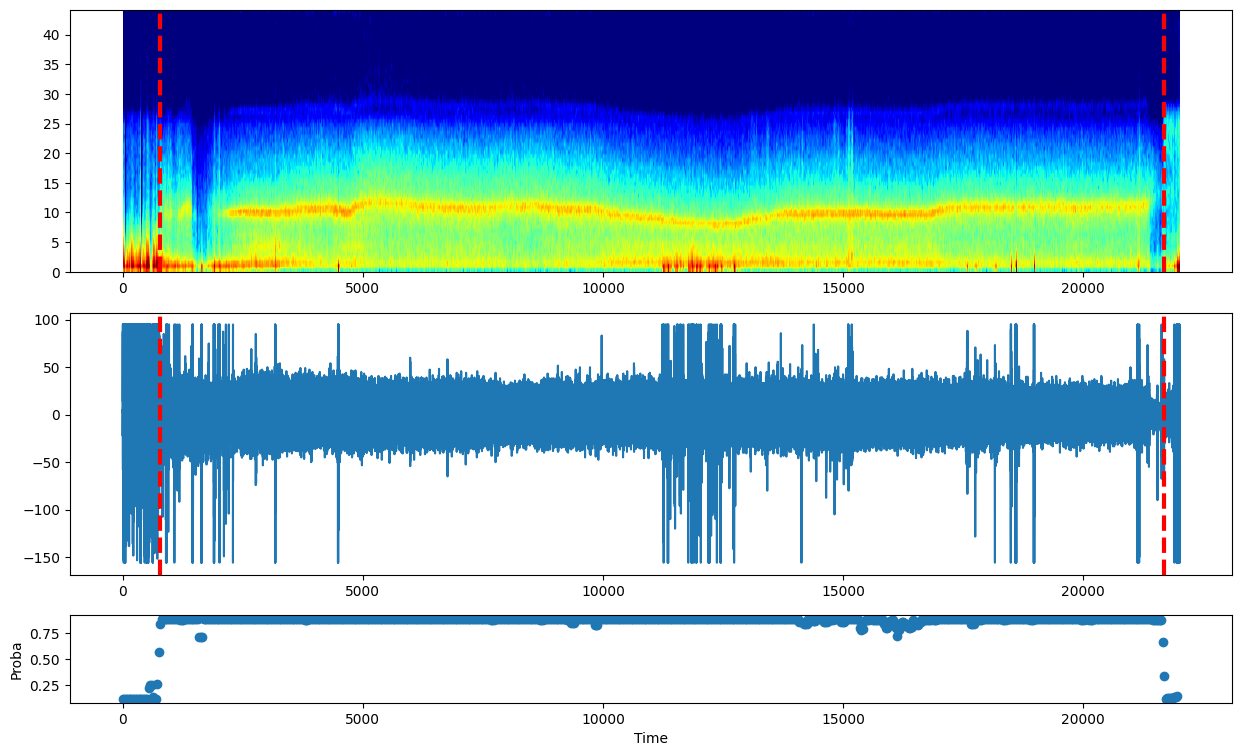

In [4]:
file_tmp = Truncate_fif(raw)
duration_sec = file_tmp.n_times / file_tmp.info["sfreq"]
print("sfreq", file_tmp.info["sfreq"])

if duration_sec > 5 * 60:
    # Extract sampling frequency and make a time vector
    Fs = file_tmp.info["sfreq"]  # Hz
    time = np.linspace(
        0,
        file_tmp.get_data().shape[1] / Fs,
        file_tmp.get_data().shape[1],
        endpoint=False,
    )
    Fp2 = file_tmp.get_data()[1, :] * 10**6  # 10*6 because .fif is saved in Volts

    # Compute LoC and RoC
    time_loc, time_roc, t_proba, proba = extract_loc_roc(file_tmp)

    # Visualize Spectrogram, EEG, and proba
    plot_spectrogram(time_loc, time_roc, Fp2, Fs, time, t_proba, proba)

In [5]:
time_loc

779.6065735367335

In [6]:
time_roc

21674.042255211058